# Reproduce S. K. Matam, et. al, Catalysts 2020, 10(12), 1370

This notebook demonstrates reproducing the XAS results of the paper with [Larch](https://xraypy.github.io/xraylarch/xafs/) using the corresponding published dataset (raw data). 

S. K. Matam, C. Moffat, P. Hellier, M. Bowker, I. P. Silverwood, C. R. A. .Catlow, S. D. Jackson, J. Craswell, P. P. Wells, S. F. Parker, E. K. Gibson (2021). **Investigation of MoOx/Al2O3 under Cyclic Operation for Oxidative and Non-Oxidative Dehydrogenation of Propane** DOI: [10.3390/catal10121370](https://doi.org/10.3390/catal10121370).

- **Corresponding authors**:  Emma K. Gibson
- **E-mails**: 

The data used for reproducing the results was published in the Enlighten Research Data Repository of the University of Glasgow [doi:10.5525/gla.researchdata.1092](http://dx.doi.org/10.5525/gla.researchdata.1092)

For more details about Larch, see [Larch Website](https://xraypy.github.io/xraylarch/xafs/)

## Reproducing XAS analysis

The XAS results of the paper are in [Figure 2](https://www.mdpi.com/2073-4344/10/12/1370), and [Table 1](https://www.mdpi.com/2073-4344/10/12/1370). 

The captions and metadata for each can be used for reproducing the results presented.

#### Figure Captions
>Figure 2. In situ X-ray Absorption Near Edge Structure (XANES) spectra of MoOx/Al2O3 at 500 °C during oxidative and non-oxidative dehydrogenation of propane cycle (A) and the change in the position of the edge energy of the XANES during on stream of the reaction cycle (B). XANES spectra and edge energies of the reference compounds MoO3, Fe2(MoO4)3 and MoO2 are also included. 
>
>Table 1. Extended X-ray Absorption Fine Structure (EXAFS) fitting parameters 1 for the spectra collected at the end of step of the reaction cycle. 

#### Metadata (ReadMe_1092.docx)
>XAFS data
>The XAFS raw data files are numbered according to the list below and can be found in the zip file ‘MoOx_Al2O3 XAFS >data’. These files were imported into Athena, where they were aligned to the Mo foil reference also included in these >raw data files. Origin was then used to produce the figures in the paper.
>
>|Starting file number |Experimental conditions|
|:--------------------|:----------------------|
|172091               |500C Helium  |
|172097               |1st ODP step |
|172137               |O2/He        |
|172179               |Propane dehydrogenation|
|172231               |2nd OPD step|



### Reproduce Figure 2

In [1]:
# Library with the functions that replicate athena:
# normalisation, merging, re-binning, 
# and visualisation (plotting)
import lib.manage_athena as athenamgr  

# File handling
from pathlib import Path

#plotting library
import matplotlib.pyplot as plt
# inline: shows plot in notebook
# tk: shows plot in popup
%matplotlib inline 

# custom plotting functions
import paper03_plots as c_plot3 # paper 3 has some similar plots

# custom plotting functions
import paper05_plots as c_plot 

In [2]:
def get_data(in_path, out_path, column_names, data_mapping):
    files_list =[]
    sample_list=[]
    for i_count, a_file  in enumerate(data_mapping):
        files_list += athenamgr.get_files_list(data_path, data_mapping[a_file])

    for i_count, a_file  in enumerate(files_list):
        file_name = a_file.name
        f_suffix = str(i_count).zfill(4) 
        p_name = f_prefix+f_suffix
        a_group = athenamgr.read_text(a_file, column_names)
        a_group.label = list(data_mapping.keys())[i_count]
        a_group.filename = list(data_mapping.keys())[i_count]
        sample_list.append(a_group)
    athena_project = Path(out_path,"read_results.prj")
    athenamgr.save_groups(sample_list, athena_project)
    return athena_project

In [3]:
import numpy as np
def normal_plot(athena_group, xlim=[],ylim=[], s_legend = True, x_off = 10.0, y_off= 0.1, line_color_style=[]):
    # plot in range
    x1_idx = np.abs(athena_group.energy - xlim[0]).argmin()
    x2_idx = np.abs(athena_group.energy - xlim[1]).argmin()
    g_energy =athena_group.energy[x1_idx:x2_idx]+x_off
    g_normal =athena_group.norm[x1_idx:x2_idx]+y_off
    g_normal[-1] = g_normal[0]
    plt.plot(g_energy,g_normal,label=athena_group.filename, color = line_color_style[0], 
             linestyle = line_color_style[1], alpha=1.0 )
    plt.fill(g_energy, g_normal,color='white', alpha=1.0 )
        
    plt.text((g_energy[0]-(len(athena_group.filename)*8)), g_normal[0]+0.05, athena_group.filename)
    
    if s_legend:
        plt.legend() # show legend
        plt.ylabel("Normalized Absorption (a.u.)")
        plt.xlabel("Energy (eV)")
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.tick_params(axis='both', which='major', labelsize=9)
    return plt

def plot_normal_3d(plt, athena_project, plot_vars):
    data_prj = athenamgr.read_project(athena_project)

    fig = plt.figure(figsize=(8,8), frameon=False)

    for mult, a_group in enumerate(data_prj.groups):
        data_group=athenamgr.get_group(data_prj, a_group)
        line_cs = plot_vars[data_group.label]
        plt = normal_plot(data_group, [19970,20150],[0 ,3.2],False, mult*20, 2-mult*0.20,line_cs)
    y_temp = plt.ylim()
    x_temp = plt.xlim()
    # use the offset to set the limits for the plotting area
    plt.xlim((x_temp[0]-100,x_temp[1] + mult*20))
    plt.ylim((y_temp[0]- mult*0.1, y_temp[1] ))
    plt.axis("off")    
    return plt

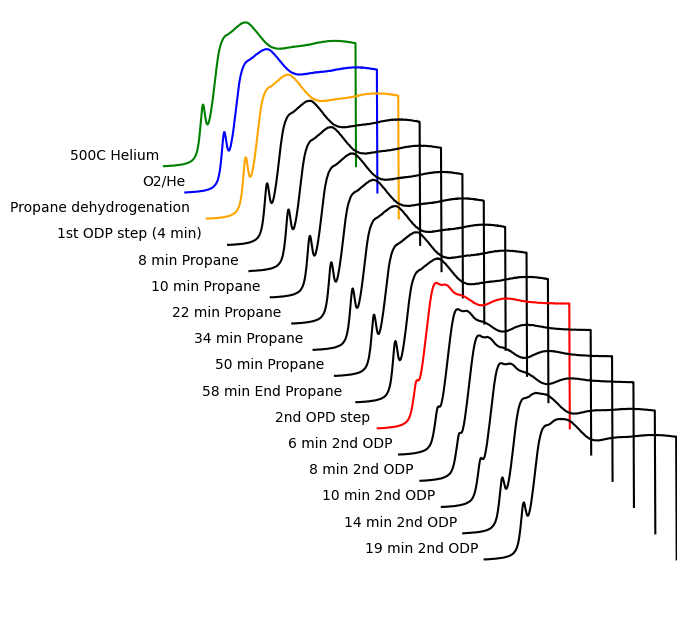

In [4]:
source_path = "C:\harwell\PSDI_test\wf_data\pub_665\DS0463\MoOx_Al2O3_XAFS_data"

# define mappings:
data_mappings_1 = {'500C Helium': '172091*.dat',
                   '1st ODP step (4 min)': '172097*.dat',
                   'O2/He': '172137*.dat',
                   'Propane dehydrogenation': '172179*.dat',
                   '2nd OPD step': '172231*.dat',
                  }
# Output prefix
# Correction of mappings 
# looking at the plot the names seem to be:
# 'Fe2(MoO4)3': '172095*.dat'
# 'MoO2': '172231*.dat',
data_mappings_2={'MoO3': '172091*.dat',
               'Fe2(MoO4)3': '172095*.dat',
               'Dried MoOx': '172096*.dat',
               'End 1st ODH': '172097*.dat',
               'Reactivation': '172098*.dat',
               '1st ODP step (4 min)': '172099*.dat',
               '8 min Propane': '172100*.dat',
               '10 min Propane': '172101*.dat',
               '22 min Propane': '172102*.dat',
               '34 min Propane': '172103*.dat',
               '50 min Propane': '172104*.dat',
               '58 min End Propane': '172105*.dat',
               'MoO2':'172231*.dat',
               '2nd OPD step': '172232*.dat',
               '6 min 2nd ODP': '172233*.dat',
               '8 min 2nd ODP': '172234*.dat',
               '10 min 2nd ODP': '172235*.dat',
               '14 min 2nd ODP': '172236*.dat',
               '19 min 2nd ODP': '172237*.dat',
              }

# extend mappings using consecutive files for
# the published data groups
data_mappings_3={'500C Helium': '172091*.dat',
               'O2/He': '172137*.dat',
               'Propane dehydrogenation': '172179*.dat',
               '1st ODP step (4 min)': '172097*.dat',
               '8 min Propane': '172098*.dat',
               '10 min Propane': '172099*.dat',
               '22 min Propane': '172102*.dat',
               '34 min Propane': '172103*.dat',
               '50 min Propane': '172104*.dat',
               '58 min End Propane': '172105*.dat',
               '2nd OPD step': '172231*.dat',
               '6 min 2nd ODP': '172232*.dat',
               '8 min 2nd ODP': '172233*.dat',
               '10 min 2nd ODP': '172234*.dat',
               '14 min 2nd ODP': '172235*.dat',
               '19 min 2nd ODP': '172236*.dat',
              }

plot_groups_1 = {'500C Helium': ["green","solid"],
                 '1st ODP step (4 min)': ["green","solid"],
                 'O2/He': ["green","solid"],
                 'Propane dehydrogenation': ["green","solid"],
                 '2nd OPD step': ["blue","solid"],
                }

plot_groups_2 = {'MoO3': ["orange","solid"],
               'Fe2(MoO4)3': ["blue","solid"],
               'Dried MoOx': ["green","solid"],
               'End 1st ODH': ["black","solid"],
               'Reactivation': ["black","solid"],
               '1st ODP step (4 min)': ["black","solid"],
               '8 min Propane': ["black","solid"],
               '10 min Propane': ["black","solid"],
               '22 min Propane': ["black","solid"],
               '34 min Propane': ["black","solid"],
               '50 min Propane': ["black","solid"],
               '58 min End Propane': ["black","solid"],
               'MoO2': ["red","solid"],
               '2nd OPD step': ["black","solid"],
               '6 min 2nd ODP': ["black","solid"],
               '8 min 2nd ODP': ["black","solid"],
               '10 min 2nd ODP': ["black","solid"],
               '14 min 2nd ODP': ["black","solid"],
               '19 min 2nd ODP': ["black","solid"],
              }

plot_groups_3 = {'500C Helium': ["green","solid"],
                 'O2/He': ["blue","solid"],
                 'Propane dehydrogenation': ["orange","solid"],
                   '1st ODP step (4 min)': ["black","solid"],
                   '8 min Propane': ["black","solid"],
                   '10 min Propane': ["black","solid"],
                   '22 min Propane': ["black","solid"],
                   '34 min Propane': ["black","solid"],
                   '50 min Propane': ["black","solid"],
                   '58 min End Propane': ["black","solid"],
                   '2nd OPD step': ["red","solid"],
                   '6 min 2nd ODP': ["black","solid"],
                   '8 min 2nd ODP': ["black","solid"],
                   '10 min 2nd ODP': ["black","solid"],
                   '14 min 2nd ODP': ["black","solid"],
                   '19 min 2nd ODP': ["black","solid"],
                }

f_prefix = "MoOx_Al"

# Labels for data in .dat files
               #"0             1    2  3  4    5      6       
               #"qexafs_energy time I0 It Iref lnI0It lnItIref
               #"0      1    2  3  4    5  6"
column_labels = "energy time I0 It Iref mu muref"

# the result is saved in outhpath named using f_prefix
data_path, process_path = athenamgr.files_setup(f_prefix, source_path)
# data is recovered 
work_project = get_data(data_path, process_path, column_labels, data_mappings_3)
# data is plotted
plt = plot_normal_3d(plt, work_project, plot_groups_3)

In [5]:
data_prj = athenamgr.read_project(work_project)

these_groups = []

for  a_group in list(data_prj._athena_groups):
    these_groups.append(athenamgr.get_group(data_prj, a_group))
    
for a_group in these_groups:
    these_groups

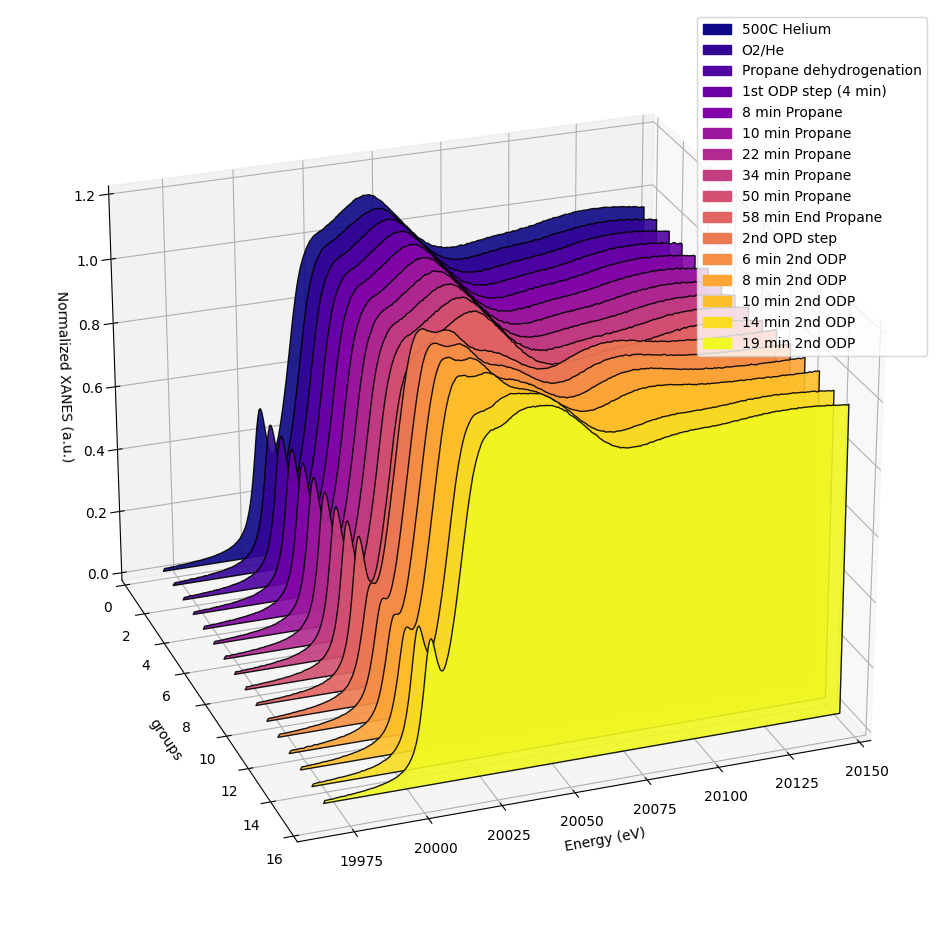

In [57]:
"""
=============================================
Generate polygons to fill under 3D line graph
=============================================

Demonstrate how to create polygons which fill the space under a line
graph. In this example polygons are semi-transparent, creating a sort
of 'jagged stained glass' effect.
"""

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
import matplotlib.pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

#plt.figure(figsize=(12,10))


# create see through colours
def cc(arg):
    return mcolors.to_rgba(arg, alpha=0.6)

def plot_normal_3db(groups = [], xlims=[19970, 20150]):
    fig = plt.figure(figsize=(12,12))
    ax = fig.add_subplot(projection = '3d')
    ax.view_init(elev=25., azim=-110)
    
    verts = []
    zs = np.arange(0, len(groups), 1)
    for z in zs:
        x1_idx = np.abs(groups[z].energy - xlims[0]).argmin()
        x2_idx = np.abs(groups[z].energy - xlims[1]).argmin()
        ys = groups[z].norm[x1_idx:x2_idx]
        # make first and last values of y [0,0] 
        # so the fill is always under the curve
        ys[0], ys[-1] = 0, 0
        xs = groups[z].energy[x1_idx:x2_idx]
        verts.append(list(zip(xs, ys)))

    poly = PolyCollection(verts, facecolors=[cc('w'), cc('w'), cc('w'), cc('w')], 
                          edgecolors= ['black'])
    
    norm = plt.Normalize(vmin=zs.min().min(), vmax=zs.max().max())
    
    x_colours  = plt.cm.plasma(norm(zs))
    these_groups
    colour_dict ={}
    for group, colour in zip(these_groups, x_colours):
        colour_dict[group.filename] = colour  
    
    poly = PolyCollection(verts,facecolors=x_colours,
                          edgecolors= ['black'])
    poly.set_alpha(0.90)
    
    # add lengends
    colour_patches = []
    for group, colour in zip(these_groups, x_colours):
        colour_patches.append(mpatches.Patch(color=colour, label=group.filename))  
    
    ax.legend(handles=colour_patches)
    
    ax.add_collection3d(poly, zs=zs, zdir='y')

    ax.set_xlabel('Energy (eV)')
    ax.set_xlim3d(19960, 20150)
    ax.set_ylabel('groups')
    ax.set_ylim3d(len(groups),0)
    ax.set_zlabel('Normalized XANES (a.u.)')
    ax.set_zlim3d(0, 1.2)
    return plt 

plt = plot_normal_3db(these_groups,xlims=[19970, 20150])
plt.show()

## Reproducibility of results

The results can be reproduced. However,  data mappings are incomplete. Only two paths which appear in Figure 2 are identified, leaving 16 

Additionally, it is not clearwhich crystal files need to be used to get the paths for fitting.

Pending contactiong authors for validation of process.


Issues:
1. only 2 of the 19 groups in figure 2 are identified in the metadata
2. the groups mentioned in table 2 are not identified in the metadata